In [175]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [176]:
#  Load the dataset
df = pd.read_csv("discharge.csv")
df

Voltage_measured  Current_measured  Temperature_measured  \
0               3.974871         -2.012528             24.389085   
1               3.951717         -2.013979             24.544752   
2               3.934352         -2.011144             24.731385   
3               3.920058         -2.013007             24.909816   
4               3.907904         -2.014400             25.105884   
...                  ...               ...                   ...   
169761          2.835283         -2.011160             37.396003   
169762          2.774711         -2.011370             37.544067   
169763          2.690974         -2.010542             37.723665   
169764          2.566085         -2.011117             37.925675   
169765          2.365585         -2.011110             38.143742   

        Current_charge  Voltage_charge      Time  Capacity  id_cycle  \
0               1.9982           3.062    35.703  1.856487         1   
1               1.9982           3.030    53.781  1.856487         1   
2               1.9982           3.011    71.922  1.856487         1   
3               1.9982           2.991    90.094  1.856487         1   
4               1.9982           2.977   108.281  1.856487         1   
...                ...             ...       ...       ...       ...   
169761          1.9986           1.937  2392.437  1.341051       132   
169762          1.9986           1.880  2406.250  1.341051       132   
169763          1.9986           1.806  2420.062  1.341051       132   
169764          1.9986           1.698  2433.890  1.341051       132   
169765          1.9986           1.524  2447.687  1.341051       132   

             type  ambient_temperature    time Battery  
0       discharge                   24  2008.0   B0005  
1       discharge                   24  2008.0   B0005  
2       discharge                   24  2008.0   B0005  
3       discharge                   24  2008.0   B0005  
4       discharge                   24  2008.0   B0005  
...           ...                  ...     ...     ...  
169761  discharge                   24  2008.0   B0018  
169762  discharge                   24  2008.0   B0018  
169763  discharge                   24  2008.0   B0018  
169764  discharge                   24  2008.0   B0018  
169765  discharge                   24  2008.0   B0018  

[169766 rows x 12 columns]

In [177]:
# Inspect the data
print(" First 5 rows:")
print(df.head())

 First 5 rows:
   Voltage_measured  Current_measured  Temperature_measured  Current_charge  \
0          3.974871         -2.012528             24.389085          1.9982   
1          3.951717         -2.013979             24.544752          1.9982   
2          3.934352         -2.011144             24.731385          1.9982   
3          3.920058         -2.013007             24.909816          1.9982   
4          3.907904         -2.014400             25.105884          1.9982   

   Voltage_charge     Time  Capacity  id_cycle       type  \
0           3.062   35.703  1.856487         1  discharge   
1           3.030   53.781  1.856487         1  discharge   
2           3.011   71.922  1.856487         1  discharge   
3           2.991   90.094  1.856487         1  discharge   
4           2.977  108.281  1.856487         1  discharge   

   ambient_temperature    time Battery  
0                   24  2008.0   B0005  
1                   24  2008.0   B0005  
2                   

In [178]:
print("\n Last 5 rows:")
print(df.tail())


 Last 5 rows:
        Voltage_measured  Current_measured  Temperature_measured  \
169761          2.835283         -2.011160             37.396003   
169762          2.774711         -2.011370             37.544067   
169763          2.690974         -2.010542             37.723665   
169764          2.566085         -2.011117             37.925675   
169765          2.365585         -2.011110             38.143742   

        Current_charge  Voltage_charge      Time  Capacity  id_cycle  \
169761          1.9986           1.937  2392.437  1.341051       132   
169762          1.9986           1.880  2406.250  1.341051       132   
169763          1.9986           1.806  2420.062  1.341051       132   
169764          1.9986           1.698  2433.890  1.341051       132   
169765          1.9986           1.524  2447.687  1.341051       132   

             type  ambient_temperature    time Battery  
169761  discharge                   24  2008.0   B0018  
169762  discharge            

In [179]:
print("\n Data Info:")
print(df.info())


 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169766 entries, 0 to 169765
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Voltage_measured      169766 non-null  float64
 1   Current_measured      169766 non-null  float64
 2   Temperature_measured  169766 non-null  float64
 3   Current_charge        169766 non-null  float64
 4   Voltage_charge        169766 non-null  float64
 5   Time                  169766 non-null  float64
 6   Capacity              169766 non-null  float64
 7   id_cycle              169766 non-null  int64  
 8   type                  169766 non-null  object 
 9   ambient_temperature   169766 non-null  int64  
 10  time                  169766 non-null  float64
 11  Battery               169766 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 15.5+ MB
None


In [180]:
print("\n Statistical Summary:")
print(df.describe())


 Statistical Summary:
       Voltage_measured  Current_measured  Temperature_measured  \
count     169766.000000     169766.000000         169766.000000   
mean           3.503756         -2.004652             31.985477   
std            0.245871          0.009801              3.780617   
min            1.737030         -2.029098             22.372620   
25%            3.389014         -2.011621             29.419671   
50%            3.507333         -2.009471             31.931205   
75%            3.665754         -1.991235             34.756413   
max            4.035025         -1.974808             42.083729   

       Current_charge  Voltage_charge           Time       Capacity  \
count   169766.000000   169766.000000  169766.000000  169766.000000   
mean         1.998999        2.573131    1446.758949       1.584585   
std          0.000704        0.238604     850.462795       0.189489   
min          1.998000        0.890000      19.468000       1.153818   
25%          1.998

In [181]:
#  Preprocessing
# 1. Remove duplicates
print("\n Checking for duplicates:", df.duplicated().sum())


 Checking for duplicates: 0


In [182]:
# 2. Handle missing values
print("\n Missing values:\n", df.isnull().sum())
#df = df.dropna()  # or fillna() if appropriate


 Missing values:
 Voltage_measured        0
Current_measured        0
Temperature_measured    0
Current_charge          0
Voltage_charge          0
Time                    0
Capacity                0
id_cycle                0
type                    0
ambient_temperature     0
time                    0
Battery                 0
dtype: int64


In [183]:
# 3. Drop unhelpful column
df.drop(columns=['type'], inplace=True)
df

Voltage_measured  Current_measured  Temperature_measured  \
0               3.974871         -2.012528             24.389085   
1               3.951717         -2.013979             24.544752   
2               3.934352         -2.011144             24.731385   
3               3.920058         -2.013007             24.909816   
4               3.907904         -2.014400             25.105884   
...                  ...               ...                   ...   
169761          2.835283         -2.011160             37.396003   
169762          2.774711         -2.011370             37.544067   
169763          2.690974         -2.010542             37.723665   
169764          2.566085         -2.011117             37.925675   
169765          2.365585         -2.011110             38.143742   

        Current_charge  Voltage_charge      Time  Capacity  id_cycle  \
0               1.9982           3.062    35.703  1.856487         1   
1               1.9982           3.030    53.781  1.856487         1   
2               1.9982           3.011    71.922  1.856487         1   
3               1.9982           2.991    90.094  1.856487         1   
4               1.9982           2.977   108.281  1.856487         1   
...                ...             ...       ...       ...       ...   
169761          1.9986           1.937  2392.437  1.341051       132   
169762          1.9986           1.880  2406.250  1.341051       132   
169763          1.9986           1.806  2420.062  1.341051       132   
169764          1.9986           1.698  2433.890  1.341051       132   
169765          1.9986           1.524  2447.687  1.341051       132   

        ambient_temperature    time Battery  
0                        24  2008.0   B0005  
1                        24  2008.0   B0005  
2                        24  2008.0   B0005  
3                        24  2008.0   B0005  
4                        24  2008.0   B0005  
...                     ...     ...     ...  
169761                   24  2008.0   B0018  
169762                   24  2008.0   B0018  
169763                   24  2008.0   B0018  
169764                   24  2008.0   B0018  
169765                   24  2008.0   B0018  

[169766 rows x 11 columns]

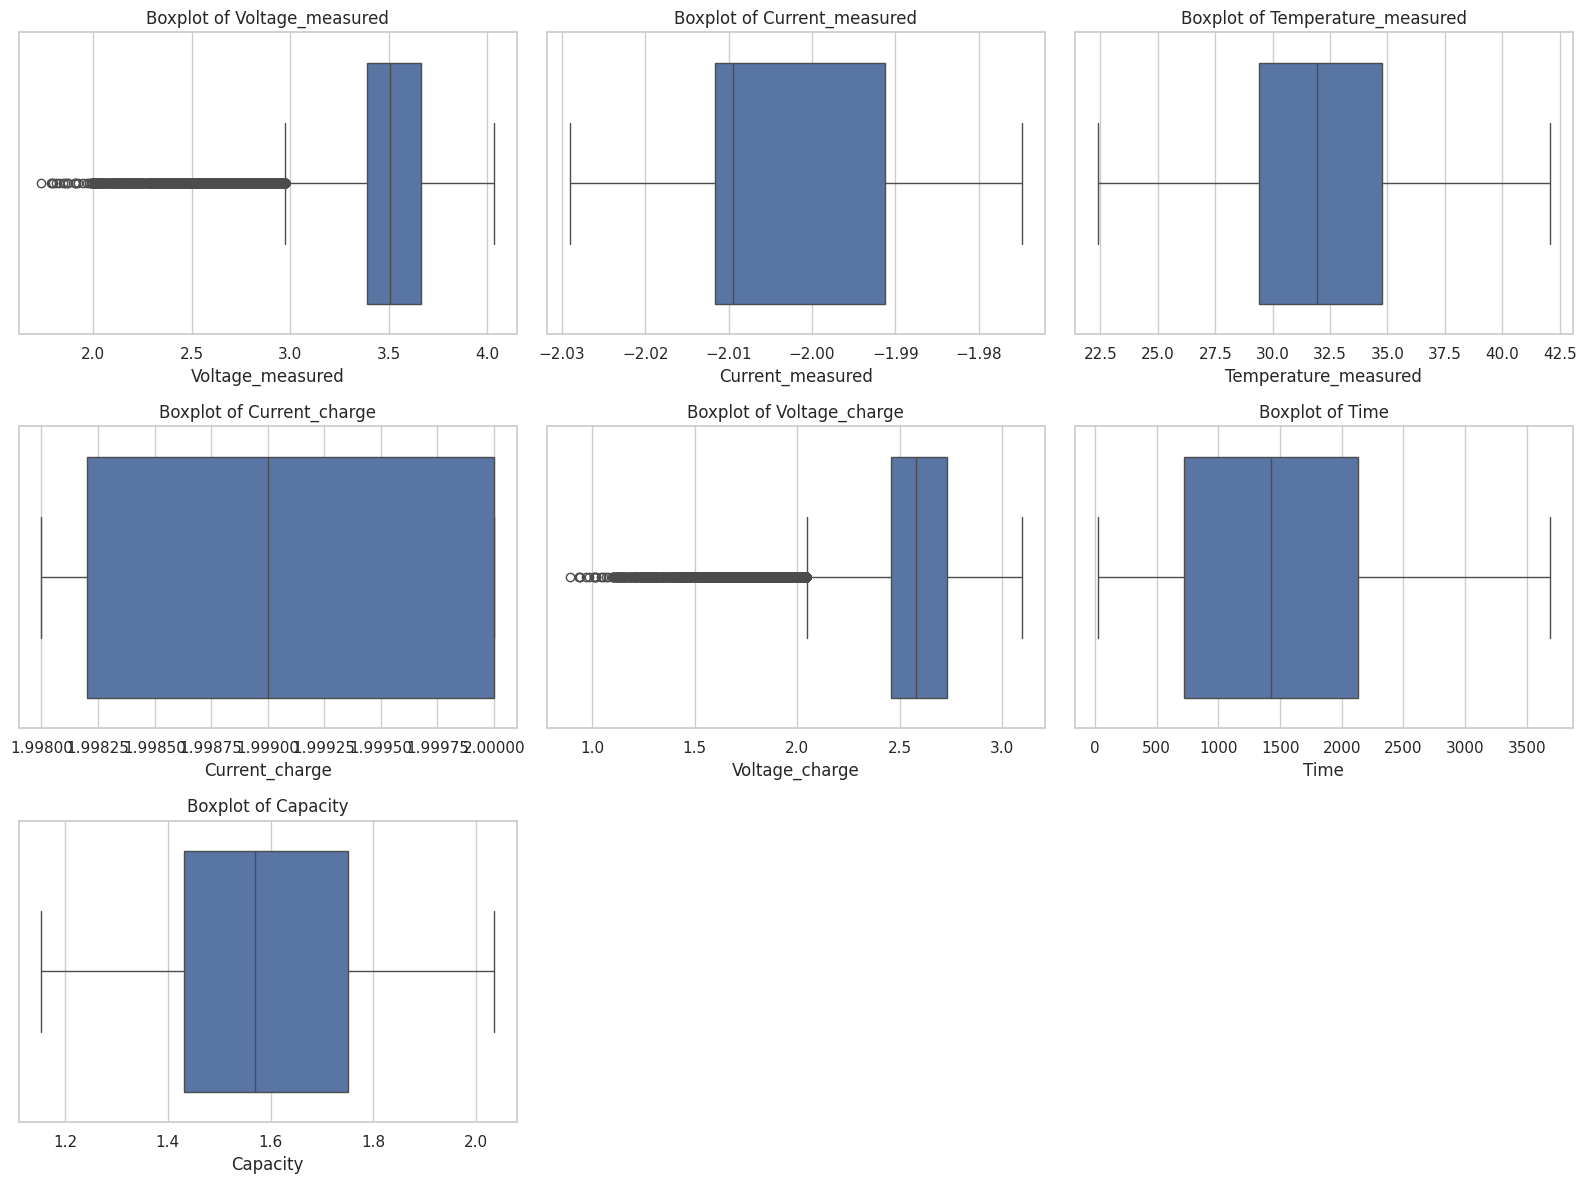

In [184]:
#  Visualize Outliers
numeric_cols = [
    'Voltage_measured', 'Current_measured', 'Temperature_measured',
    'Current_charge', 'Voltage_charge', 'Time', 'Capacity'
]

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [185]:
#  Handle Outliers using IQR
df_cleaned = df.copy()
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Replace outliers with median
    median = df_cleaned[col].median()
    df_cleaned[col] = np.where(
        (df_cleaned[col] < lower) | (df_cleaned[col] > upper),
        median,
        df_cleaned[col]
    )


In [186]:
print("\n Outliers handled using IQR + Median Replacement")


 Outliers handled using IQR + Median Replacement


In [187]:
#  Prepare Data
X = df_cleaned.drop(['Capacity', 'id_cycle', 'ambient_temperature'], axis=1)
y = df_cleaned['Capacity']

# Split categorical and numerical
categorical_features = ['Battery']
numerical_features = [col for col in X.columns if col not in categorical_features]

In [188]:
# Assume X is a pandas DataFrame
# Separate numerical and categorical features manually
X_num = X[numerical_features]
X_cat = X[categorical_features]

# Scale numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# One-hot encode categorical features
encoder = OneHotEncoder(drop=None, sparse_output=False)

X_cat_encoded = encoder.fit_transform(X_cat)

# Combine processed numerical and categorical features
import numpy as np
X_processed = np.hstack((X_num_scaled, X_cat_encoded))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Initialize and train the Ridge regression model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Results:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Train R²: {model.score(X_train, y_train):.4f}")
print(f"Test R²: {model.score(X_test, y_test):.4f}")

# Save the model and preprocessing objects for later use
joblib.dump(model, "ridge_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoder, "encoder.pkl")

print("Model and preprocessors saved.")

Evaluation Results:
RMSE: 0.1126
MAE: 0.0851
R² Score: 0.6451
Train R²: 0.6527
Test R²: 0.6451
Model and preprocessors saved.
